# Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import h5py
import coco
import utils
import model as modellib
import visualize

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

Using TensorFlow backend.


## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.
## Create Model and Load Trained Weights

## Class Names

The model classifies objects and returns class IDs, which are integer value that identify each class. Some datasets assign integer values to their classes and some don't. For example, in the MS-COCO dataset, the 'person' class is 1 and 'teddy bear' is 88. The IDs are often sequential, but not always. The COCO dataset, for example, has classes associated with class IDs 70 and 72, but not 71.

To improve consistency, and to support training on data from multiple sources at the same time, our ```Dataset``` class assigns it's own sequential integer IDs to each class. For example, if you load the COCO dataset using our ```Dataset``` class, the 'person' class would get class ID = 1 (just like COCO) and the 'teddy bear' class is 78 (different from COCO). Keep that in mind when mapping class IDs to class names.

To get the list of class names, you'd load the dataset and then use the ```class_names``` property like this.
```
# Load COCO dataset
dataset = coco.CocoDataset()
dataset.load_coco(COCO_DIR, "train")
dataset.prepare()

# Print class names
print(dataset.class_names)
```

We don't want to require you to download the COCO dataset just to run this demo, so we're including the list of class names below. The index of the class name in the list represent its ID (first class is 0, second is 1, third is 2, ...etc.)

In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    IMAGE_MAX_DIM = 512
config = InferenceConfig()
config.display()


# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCneO
model.load_weights(COCO_MODEL_PATH, by_name=True)
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']


Configurations:
BACKBONE_SHAPES                [[128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]
 [  8   8]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [ 0.1  0.1  0.2  0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  512
IMAGE_MIN_DIM                  1024
IMAGE_PADDING                  True
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [ 123.7  116.8  103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           coco
NUM_CLASSES                    81
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE        1000
POST_NMS_ROIS_TRAINING 

## Run Object Detection

Processing 1 images
image                    shape: (626, 640, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max:  640.00000
[('masks', (626, 640, 3)), ('features', (16, 16, 2048)), ('class_ids', (3,)), ('rois', (3, 4))]


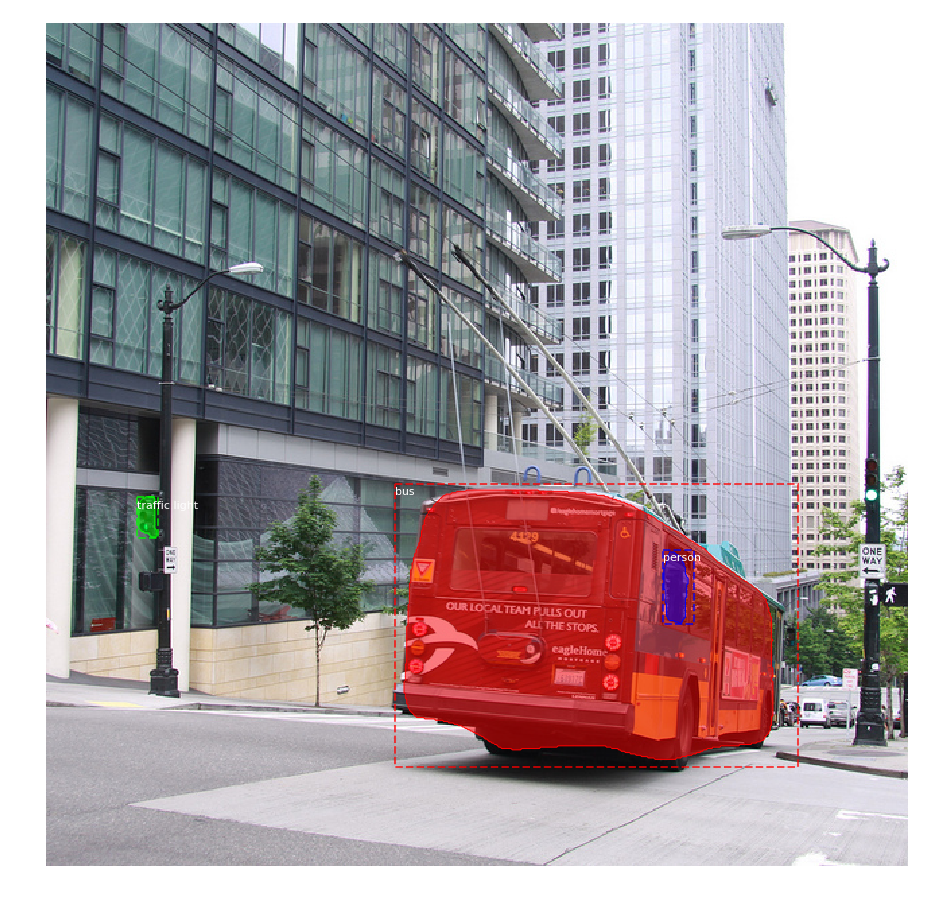

In [3]:
# Load a random image from the images folder

config.IMAGES_PER_GPU = 1
config.BATCH_SIZE = 1
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)
# print(np.shape(results[0]),results[0])
print([(keys,np.shape(results[0][keys])) for keys in results[0] ])

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names)#, r['scores'])

(2, 240, 320, 3)
Processing 2 images
image                    shape: (240, 320, 3)         min:    0.00000  max:  255.00000
image                    shape: (240, 320, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (2, 89)               min:    0.00000  max: 1024.00000


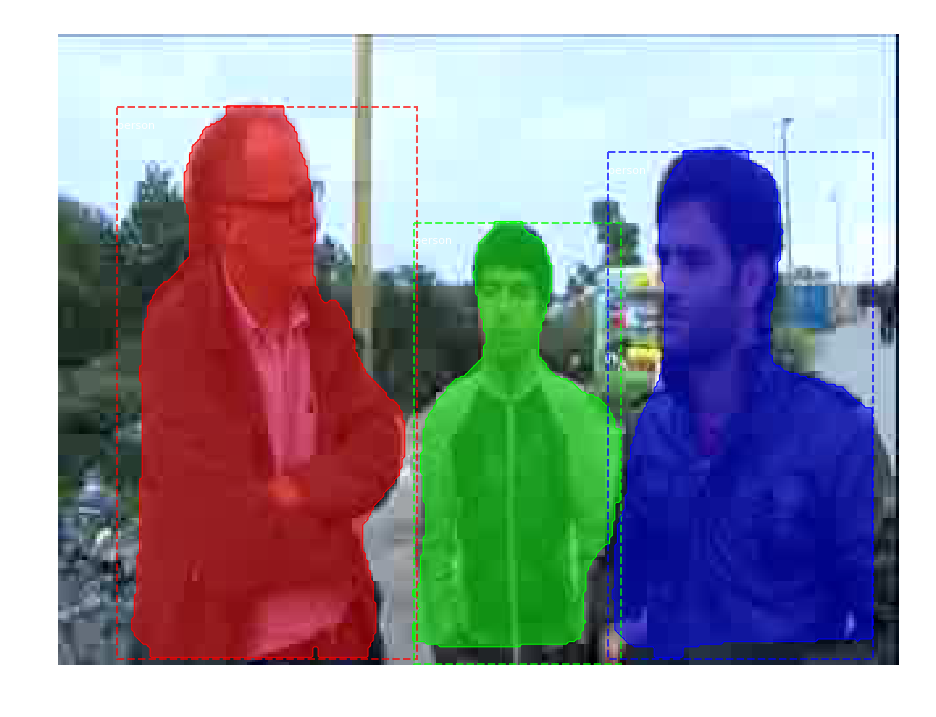

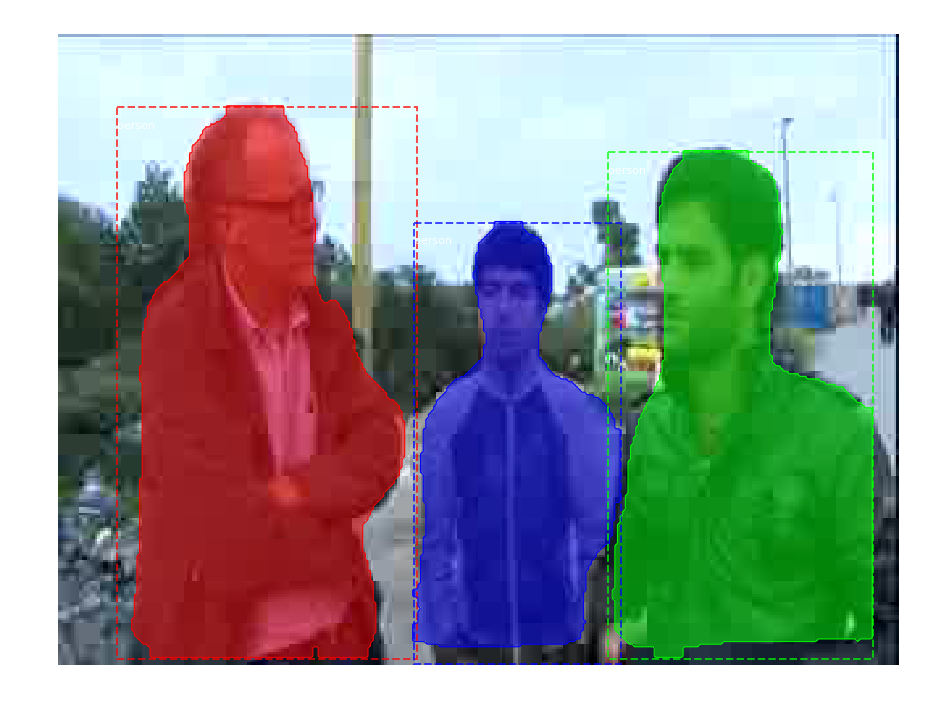

In [4]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 2
    BATCH_SIZE = 2
    
config = InferenceConfig()

images_batchs = np.zeros((2,240,320, 3),dtype = np.float32)#np.uint8)  

image = skimage.io.imread('0253.jpg')
# image,_,_,_ = utils.resize_image(
#     image, 
#     min_dim = 512, #config.IMAGE_MIN_DIM, 
#     max_dim = 512, #config.IMAGE_MAX_DIM,
#     padding = config.IMAGE_PADDING)
images_batchs[0] = image.copy() #np.uint8
images_batchs[1] = image.copy()#np.uint8
print(np.shape(images_batchs))
# print(images_batchs[0])
# Run detection
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)
results = model.detect(images_batchs, verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names)#, r['scores'])
r = results[1]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names)#, r['scores'])

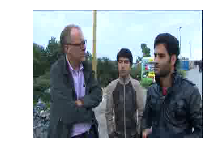

In [16]:
image = skimage.io.imread('0253.jpg')
visualize.display_images([image])

image = utils.resize_image(image, min_dim=1024, max_dim=1024, padding=True)
visualize.display_images([image])


In [12]:
mask = r['masks'][:, :, 1]
color = visualize.random_colors(1)
print(color)
masked_image = image.astype(np.uint32).copy()
masked_image = visualize.apply_mask(masked_image, mask, color)

# Mask Polygon
# Pad to ensure proper polygons for masks that touch image edges.
padded_mask = np.zeros(
    (mask.shape[0] + 2, mask.shape[1] + 2), dtype=np.uint8)
padded_mask[1:-1, 1:-1] = mask
contours = find_contours(padded_mask, 0.5)

[(1.0, 0.0, 0.0)]


TypeError: can't multiply sequence by non-int of type 'float'

In [9]:
import imageio
import PIL.Image as Image
import numpy as np
import model as modellib
import coco
import os

class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
config = InferenceConfig()
config.display()


reader = imageio.get_reader("v_ApplyEyeMakeup_g10_c04.avi","ffmpeg") #("_0nX-El-ySo_83_93.avi", "ffmpeg")
fps = reader.get_meta_data()["fps"]
frames = np.array([ np.uint8(frame) for i, frame in enumerate(reader) if i < 2 ])
config.BATCH_SIZE = frames.shape[0]
config.IMAGES_PER_GPU = frames.shape[0]

ROOT_DIR = os.getcwd()
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")


model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)
results = model.detect(frames,verbose=1)



Configurations:
BACKBONE_SHAPES                [[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [ 0.1  0.1  0.2  0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_MIN_DIM                  1024
IMAGE_PADDING                  True
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [ 123.7  116.8  103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           coco
NUM_CLASSES                    81
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE        1000
POST_NMS_ROIS_TRAIN

2 (2, 240, 320, 3)


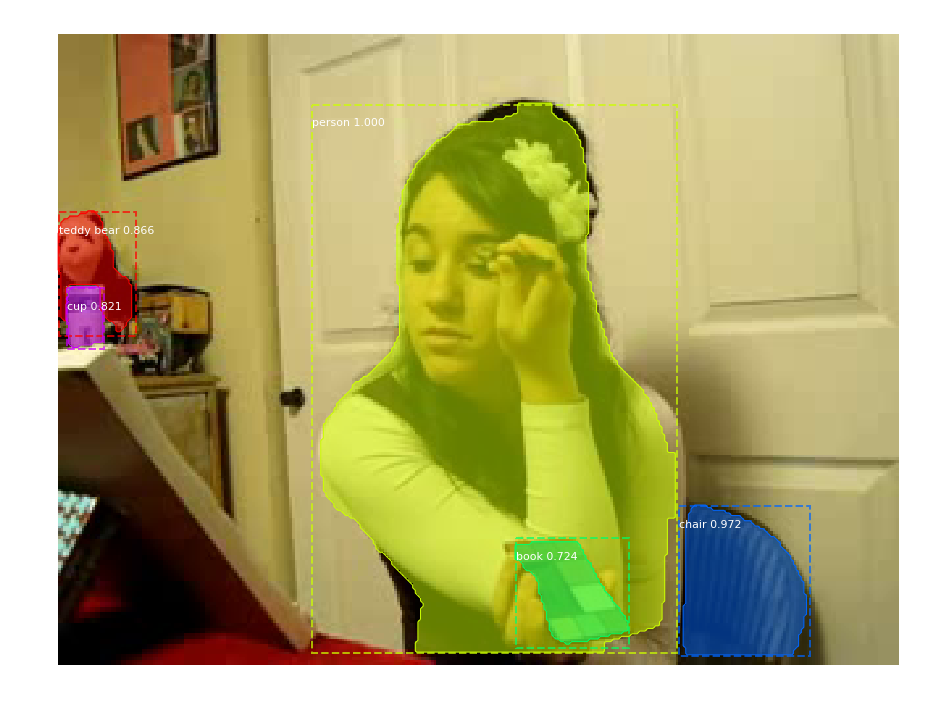

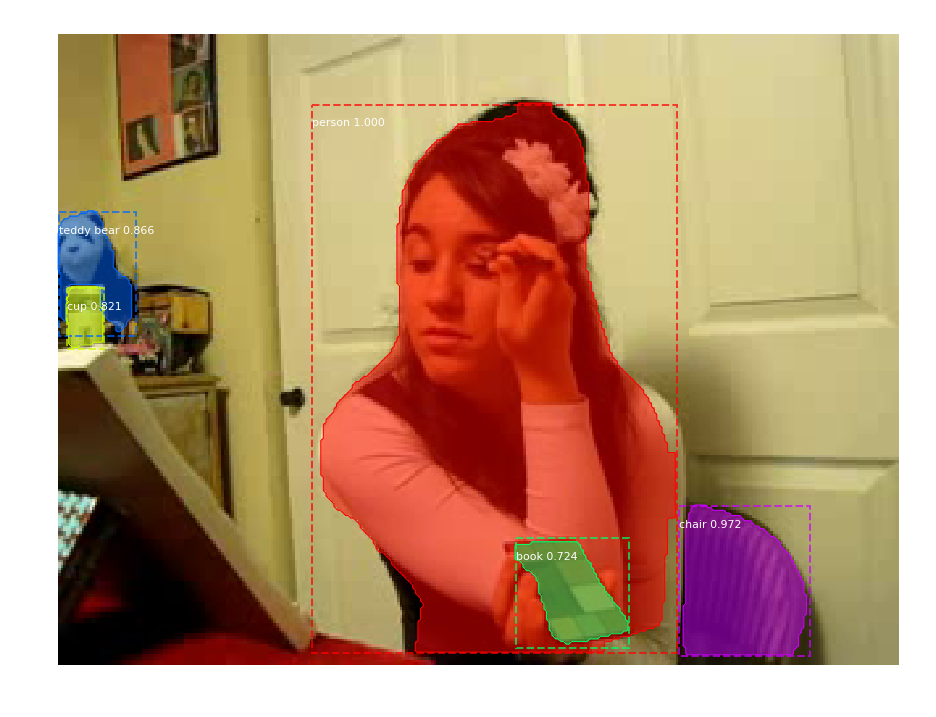

In [10]:
print(len(frames),np.shape(frames))
# r = results[9]
# print([np.shape(r[keys]) for keys in r ])
for i in range(len(results)):
    r = results[i]
    visualize.display_instances(frames[i], r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

(2, 240, 320, 3)
Processing 2 images
image                    shape: (240, 320, 3)         min:    0.00000  max:  255.00000
image                    shape: (240, 320, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (2, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (2, 89)               min:    0.00000  max: 1024.00000
2 (2, 240, 320, 3)


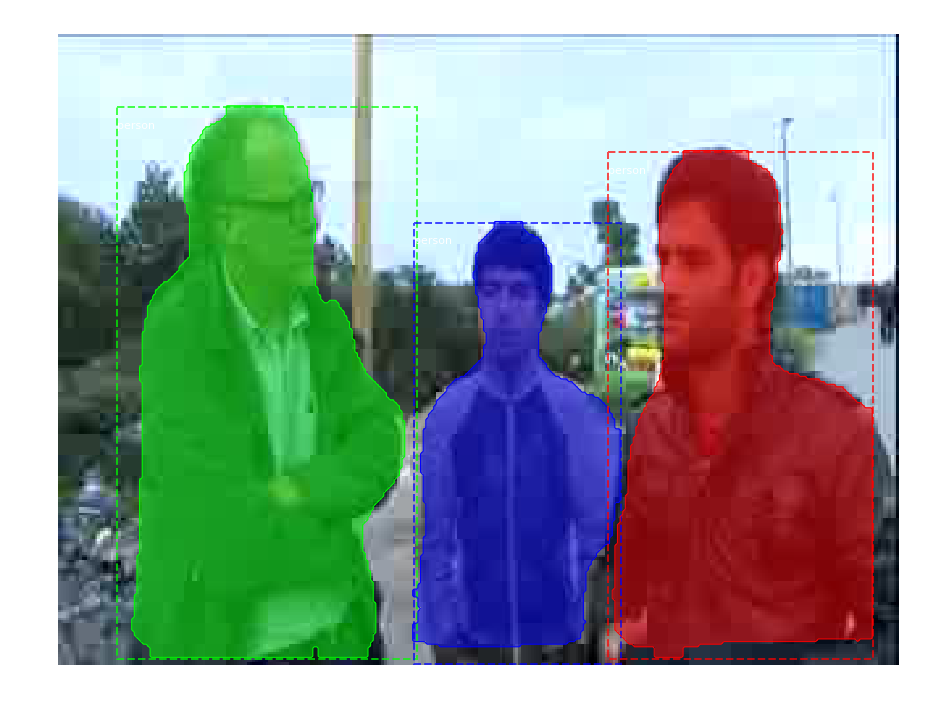

[('masks', (240, 320, 3)), ('features', (32, 32, 2048)), ('class_ids', (3,)), ('rois', (3, 4))]


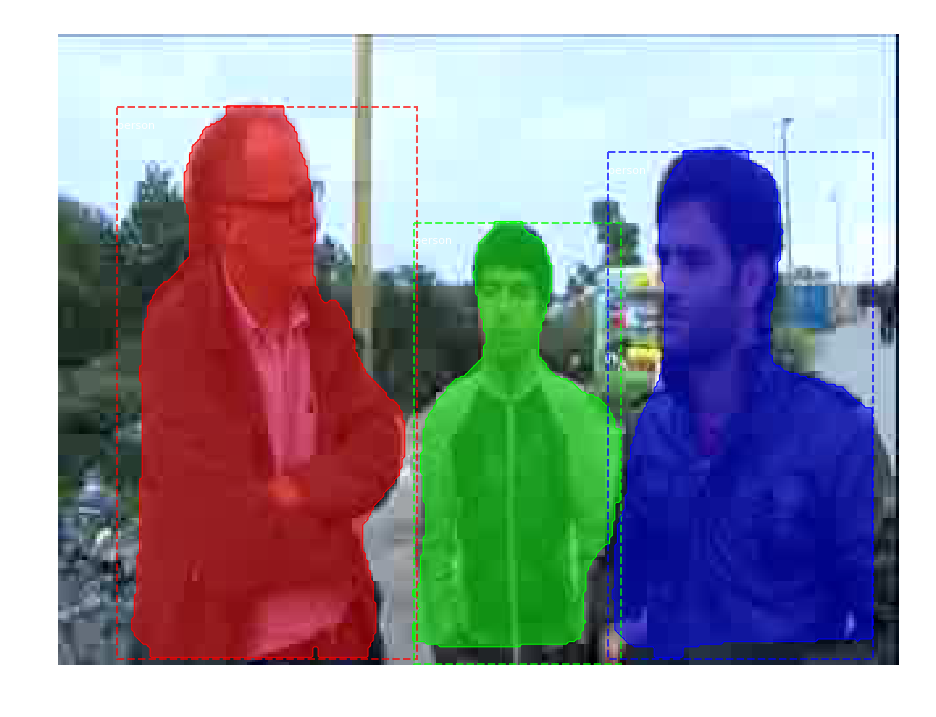

[('masks', (240, 320, 3)), ('features', (32, 32, 2048)), ('class_ids', (3,)), ('rois', (3, 4))]


In [5]:
config.IMAGES_PER_GPU = 2
config.BATCH_SIZE = 2

images_batchs = np.zeros((2,240,320, 3),dtype=np.float32)  

image = skimage.io.imread('0253.jpg')
images_batchs[0] = image.copy()
images_batchs[1] = image.copy()

print(np.shape(images_batchs))
results = model.detect(images_batchs,verbose=1)
print(len(images_batchs),np.shape(images_batchs))
# r = results[9]
# print([np.shape(r[keys]) for keys in r ])
for i in range(len(results)):
    r = results[i]
    visualize.display_instances(images_batchs[i], r['rois'], r['masks'], r['class_ids'], class_names)#, r['scores'])
    print([(keys,np.shape(r[keys])) for keys in r ])

# test mask shape

In [123]:
boxes = r["rois"]
mrcnn_mask = r['origin_mask']
masks = mrcnn_mask[np.arange(17), :, :, r['class_ids']]
exclude_ix = np.where(
    (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1]) <= 0)[0]
if exclude_ix.shape[0] > 0:
    boxes = np.delete(boxes, exclude_ix, axis=0)
#     class_ids = np.delete(class_ids, exclude_ix, axis=0)
#     scores = np.delete(scores, exclude_ix, axis=0)
    masks = np.delete(masks, exclude_ix, axis=0)
#     N = class_ids.shape[0]
print(np.shape(masks))
# Resize masks to original image size and set boundary threshold.
full_masks = []
# for i in range(N):
#     # Convert neural network mask to full size mask
#     full_mask = utils.unmold_mask(masks[i], boxes[i], image_shape)
#     full_masks.append(full_mask)
# full_masks = np.stack(full_masks, axis=-1)\
#     if full_masks else np.empty((0,) + masks.shape[1:3])
for i in range(17):
    full_mask = utils.unmold_mask(masks[i], boxes[i], np.shape(image))
    full_masks.append(full_mask)
full_masks = np.stack(full_masks, axis=-1)\
    if full_masks else np.empty((0,) + masks.shape[1:3])
print(np.shape(full_masks),np.shape(image))

(17, 28, 28)
(424, 640, 17) (424, 640, 3)


424 640
(424, 640)
(28, 28, 3)
(81, 81, 17) [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


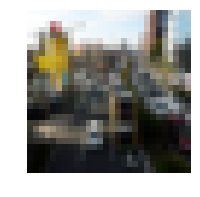

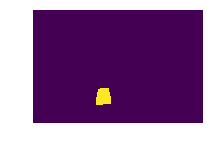

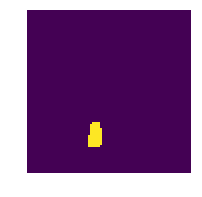

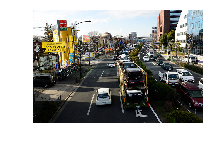

In [124]:
import scipy
h, w = full_masks.shape[:2]
print(h,w)
scale = 1
image_max = max(h, w)
max_dim = 28
if round(image_max * scale) > max_dim:
    scale = max_dim / image_max
print(np.shape(full_masks[:,:,0]))
# Resize image and mask

aaaa = scipy.misc.imresize(
            image, (28,28))
print(np.shape(aaaa))

if scale != 1:
#     mask_resize = scipy.misc.imresize(
#         full_masks, (round(h * scale), round(w * scale)))
    masks_resize = []
    for i in range(17):
        mask_re = scipy.misc.imresize(
            full_masks[:,:,i], (81,81)) #, interp='bilinear') #.astype(np.float32) / 255.0
        masks_resize.append(mask_re)
    masks_resize = np.stack(masks_resize, axis=-1)\
        if masks_resize else np.empty((0,) + masks.shape[1:3])
print(np.shape(masks_resize),masks_resize[:,:,1])
# config.IMAGE_MAX_DIM
visualize.display_images([aaaa])
visualize.display_images([full_masks[:,:,1]])
visualize.display_images([masks_resize[:,:,1]])
visualize.display_images([image])





In [4]:
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 20
    IMAGE_MAX_DIM = 512
    IMAGE_MIN_DIM = 512
    BATCH_SIZE = 20
config = InferenceConfig()
config.display()
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)
video_image_path = '/hdfs/qiuyurui/DATA/TEST_IMAGE/'   #youtube_image/'
video_all = {}
all_image_path = []
name_with_path = []
for video_forder in os.listdir(video_image_path):
    video_name = video_forder
    hdf5_p = '/hdfs/qiuyurui/DATA/hdf5/'
    hdf5_path = os.path.join(hdf5_p, video_forder)
    if not os.path.exists(hdf5_path):
        os.mkdir(hdf5_path)
    subdir = os.path.join(video_image_path, video_name)
    image_all = {}
    for image_file in os.listdir(subdir):
        image_name = image_file[:-4]
        image_path = os.path.join(subdir, image_file)
        all_image_path.append(image_path)
        image_all[image_name] = image_path
        name_with_path.append({'video':video_name,
                          'image_name':image_name,'image_path':image_path})
    video_all[video_name] = image_all
#         print(image_name)
#     for 
# print(all_image_path[100])
# print(video_all['vid1']['0001'])
print(len(name_with_path))

def load_image_for_batch(image_path, config):
    image = skimage.io.imread(image_path)
#     shape = image.shape
    image, _, _, _ = utils.resize_image(
        image,
        min_dim=config.IMAGE_MIN_DIM,
        max_dim=config.IMAGE_MAX_DIM,
        padding=config.IMAGE_PADDING)
    return image

#def generate_mask_batch(batch_size = config.BATCH_SIZE, config, name_with_path):
number_image = len(name_with_path)
last_number = number_image


#     for n in rang(batch_num):
n = 0
batch_size = config.BATCH_SIZE
batch_num = number_image/batch_size
images_batchs = np.zeros((batch_size, config.IMAGE_MAX_DIM, config.IMAGE_MAX_DIM, 3))
m = 1
# last_number = last_number - batch_size
while last_number >= batch_size:
    vid_image = []
    r = []
    for i in range(batch_size):
        image_path = name_with_path[n]['image_path']
        video = name_with_path[n]['video']
        image_name = name_with_path[n]['image_name']
        resize_image = load_image_for_batch(image_path, config)
        images_batchs[i] = resize_image.copy()
        vid_image.append({'video':video, 'image_name': image_name})
        n = n+1
    last_number = last_number - batch_size
    print(len(images_batchs))
    r = model.detect(images_batchs)
    for i in range(batch_size):
        f = h5py.File('/hdfs/qiuyurui/DATA/hdf5/{}/{}.h5'.format(vid_image[i]['video'],vid_image[i]['image_name']),'w')
        f['features'] = r[i]['features']
        f['masks'] = r[i]['masks']
        f['class_ids'] = r[i]['class_ids']
        f['rois'] = r[i]['rois']
        f.close()
    print(m,' batch number / {}'.format(batch_num))
    m = m+1 
    
#     break
if last_number > 0 and last_number < batch_size:
    config.BATCH_SIZE = last_number
    config.IMAGES_PER_GPU = last_number
    batch_size = last_number
    images_batchs = np.zeros((batch_size, config.IMAGE_MAX_DIM, config.IMAGE_MAX_DIM, 3))
    vid_image = []
    r = []
    for i in range(batch_size):
        image_path = name_with_path[n]['image_path']
        video = name_with_path[n]['video']
        image_name = name_with_path[n]['image_name']
        resize_image = load_image_for_batch(image_path, config)
        images_batchs[i] = resize_image.copy()
        vid_image.append({'video':video, 'image_name': image_name})
        n = n+1
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
    model.load_weights(COCO_MODEL_PATH, by_name=True)
    r = model.detect(images_batchs)
    for i in range(batch_size):
        f = h5py.File('/hdfs/qiuyurui/DATA/hdf5/{}/{}.h5'.format(vid_image[i]['video'],vid_image[i]['image_name']),'w')
        f['features'] = r[i]['features']
        f['masks'] = r[i]['masks']
        f['class_ids'] = r[i]['class_ids']
        f['rois'] = r[i]['rois']
        f.close()
    print(m,' batch number / {}'.format(batch_num))
#     print(len(r))



Configurations:
BACKBONE_SHAPES                [[128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]
 [  8   8]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     20
BBOX_STD_DEV                   [ 0.1  0.1  0.2  0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 20
IMAGE_MAX_DIM                  512
IMAGE_MIN_DIM                  512
IMAGE_PADDING                  True
IMAGE_SHAPE                    [512 512   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [ 123.7  116.8  103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           coco
NUM_CLASSES                    81
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE        1000
POST_NMS_ROIS_TRAINING

In [3]:
import os
video_image_path = '/hdfs/qiuyurui/DATA/MSR_VTT_2017_train_image_3/'   #youtube_image/'
video_all = {}
all_image_path = []
name_with_path = []
for video_forder in os.listdir(video_image_path):
    video_name = video_forder
#     hdf5_p = '/hdfs/qiuyurui/DATA/hdf5/'
#     hdf5_path = os.path.join(hdf5_p, video_forder)
#     if not os.path.exists(hdf5_path):
#         os.mkdir(hdf5_path)
    subdir = os.path.join(video_image_path, video_name)
    image_all = {}
    for image_file in os.listdir(subdir):
        image_name = image_file[:-4]
        image_path = os.path.join(subdir, image_file)
        all_image_path.append(image_path)
        image_all[image_name] = image_path
        name_with_path.append({'video':video_name,
                          'image_name':image_name,'image_path':image_path})
    video_all[video_name] = image_all
#         print(image_name)
#     for 
# print(all_image_path[100])
# print(video_all['vid1']['0001'])
print(len(name_with_path))

465568


In [51]:

f = h5py.File('{}.h5'.format(video),'w') 
# f[video][image_name] = r[0]['masks']
f[image_name]=r[1]['features']
# f['masks'][video]=r[0]['masks']
f.close()                           

In [33]:
ff = h5py.File('HDF5_FILE.h5','r')
fl =ff[video]
print(np.shape(fl))
ff.close()

(1024, 1024, 1)


In [55]:
#  for i in range(batch_size):
f = h5py.File('/hdfs/qiuyurui/DATA/hdf5/{}_{}.h5'.format(video,'1'),'w') 
f.close()

OSError: Unable to create file (Unable to truncate a file which is already open)

In [5]:
# class InferenceConfig(coco.CocoConfig):
#     GPU_COUNT = 1
#     IMAGES_PER_GPU = 20
#     IMAGE_MAX_DIM = 512
#     IMAGE_MIN_DIM = 512
#     BATCH_SIZE = 20
# config = InferenceConfig()
# config.display()
# model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
# model.load_weights(COCO_MODEL_PATH, by_name=True)
video_image_path = '/data/qiuyurui/MSR_VTT_2017_train_image_3/'   #youtube_image/'
# video_all = {}
# all_image_path = []
name_with_path = []
for video_forder in os.listdir(video_image_path):
    video_name = video_forder
    hdf5_p = '/backup/qiuyurui/hdf5_msr/'
    
    subdir = os.path.join(video_image_path, video_name)
#     image_all = {}
    for image_file in os.listdir(subdir):
        image_name = image_file[:-4]
        image_path = os.path.join(subdir, image_file)
#         all_image_path.append(image_path)
        if not os.path.isfile('/hdfs/qiuyurui/DATA/hdf5_msr/{}/{}.h5'.format(video_forder,image_name)):
#             image_all[image_name] = image_path
            name_with_path.append({'video':video_name,
                              'image_name':image_name,'image_path':image_path})
            hdf5_path = os.path.join(hdf5_p, video_name)
            if not os.path.exists(hdf5_path):
                os.mkdir(hdf5_path)
#     video_all[video_name] = image_all
print(len(name_with_path))



# def load_image_for_batch(image_path, config):
#     image = skimage.io.imread(image_path)
# #     shape = image.shape
#     image, _, _, _ = utils.resize_image(
#         image,
#         min_dim=config.IMAGE_MIN_DIM,
#         max_dim=config.IMAGE_MAX_DIM,
#         padding=config.IMAGE_PADDING)
#     return image

# #def generate_mask_batch(batch_size = config.BATCH_SIZE, config, name_with_path):
# number_image = len(name_with_path)
# last_number = number_image


# #     for n in rang(batch_num):
# n = 0
# batch_size = config.BATCH_SIZE
# batch_num = number_image/batch_size
# images_batchs = np.zeros((batch_size, config.IMAGE_MAX_DIM, config.IMAGE_MAX_DIM, 3))
# m = 1
# last_number = last_number - batch_size
# while last_number >= batch_size:
#     vid_image = []
#     r = []
#     for i in range(batch_size):
#         image_path = name_with_path[n]['image_path']
#         video = name_with_path[n]['video']
#         image_name = name_with_path[n]['image_name']
#         resize_image = load_image_for_batch(image_path, config)
#         images_batchs[i] = resize_image.copy()
#         vid_image.append({'video':video, 'image_name': image_name})
#         n = n+1
#     last_number = last_number - batch_size
#     print(len(images_batchs))
#     r = model.detect(images_batchs)
#     for i in range(batch_size):
#         f = h5py.File('/hdfs/qiuyurui/DATA/hdf5/{}/{}.h5'.format(vid_image[i]['video'],vid_image[i]['image_name']),'w')
#         f['features'] = r[i]['features']
#         f['masks'] = r[i]['masks']
#         f['class_ids'] = r[i]['class_ids']
#         f['rois'] = r[i]['rois']
#         f.close()
#     print(m,' batch number / {}'.format(batch_num))
#     m = m+1 
    
# #     break
# if last_number > 0 and last_number < batch_size:
#     config.BATCH_SIZE = last_number
#     config.IMAGES_PER_GPU = last_number
#     batch_size = last_number
#     images_batchs = np.zeros((batch_size, config.IMAGE_MAX_DIM, config.IMAGE_MAX_DIM, 3))
#     vid_image = []
#     r = []
#     for i in range(batch_size):
#         image_path = name_with_path[n]['image_path']
#         video = name_with_path[n]['video']
#         image_name = name_with_path[n]['image_name']
#         resize_image = load_image_for_batch(image_path, config)
#         images_batchs[i] = resize_image.copy()
#         vid_image.append({'video':video, 'image_name': image_name})
#         n = n+1
#     model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
#     model.load_weights(COCO_MODEL_PATH, by_name=True)
#     r = model.detect(images_batchs)
#     for i in range(batch_size):
#         f = h5py.File('/hdfs/qiuyurui/DATA/hdf5/{}/{}.h5'.format(vid_image[i]['video'],vid_image[i]['image_name']),'w')
#         f['features'] = r[i]['features']
#         f['masks'] = r[i]['masks']
#         f['class_ids'] = r[i]['class_ids']
#         f['rois'] = r[i]['rois']
#         f.close()
#     print(m,' batch number / {}'.format(batch_num))
# #     print(len(r))


76685
